> **Topic:** Introduction to Neural Network using PyTorch
>
> **Module:** PyTorch Datasets and Tensors
>
> **Presentor:** Industry Sandbox and AI Computing (ISAIC)
>
> **Date:** 

## Getting Started

Before getting started, if you want to install Torch libraries on your machine, please go here:
<https://pytorch.org/get-started/locally/>

We will explore the following topics in this notebook:
- Available pre-built PyTorch datasets
- Basic structure of PyTorch datasets class
- PyTorch Tensors

In [36]:
#start with loading the required modules
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms

#import numpy module
import numpy as np

#import plotting modules
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', dpi=350)
%matplotlib inline


## PyTorch Datasets

PyTorch comes with many pre-built datasets derived from publicly available data for use in machine learning applications and benchmarking.

Available datasets can be found **[here](https://pytorch.org/vision/stable/datasets.html)**.

There are also audio datasets available in `torchaudio` and natural language datasets available in `torchtext` libraries.

In our exercise today, we will have a look at two such example datasets. Before diving into the examples, let's have a look at the basic structure of the pytorch `datasets` class.

**PyTorch Dataset Structure**

In general, most of the pytorch datasets have few common basic attributes:

```
CLASS torchvision.datasets.<DatasetName>(root: str, train: bool = True,
                                        transform: Optional[Callable] = None,
                                        target_transform: Optional[Callable] = None, 
                                        download: bool = True)
```

- `root` specifies the directory where the data is stored or will be stored.
- `train` specifies whether to load the training or test part of the datasets. Some datasets might have separate *validation* dataset.
- `transform` takes the callable torch transform functions to apply on the data
- `target_transform` takes the transform functions to apply on target labels
- `download` specifies if we want to download the dataset (should be set to `False` if already downloaded or locally available)


### `CIFAR10`
This dataset consists of total 60K 32$\times$32 color images of different objects and these images belong to one of the 10 classes. They are mutually exclusive.

In [21]:
#load datasets
#loading the training data
train_data = datasets.CIFAR10(
                root='CIFAR10',
                train=True,
                download=True,
                transform=transforms.ToTensor())

#Raw images in the dataset is store as Python Imaging Library (PIL) format
#Transform.ToTensor converts the PIL format data into pytorch tensor format

#loading the test data
test_data = datasets.CIFAR10(
                root='CIFAR10',
                train=False,
                download=True,
                transform=transforms.ToTensor())

#check the number of samples, shapes of the datasets, etc
print (f'No. of samples in the training set: {len(train_data)}')
print (f'No. of samples in the test set: {len(test_data)}')

#get the sample label name, value mapping
label_map = train_data.class_to_idx
#check the mapping
print(f'\nMapping of each image class to label value: {label_map}')

No. of samples in the training set: 50000
No. of samples in the test set: 10000

Mapping of each image class to label value: {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


- Now let's have a look at how the samples in the dataset look like

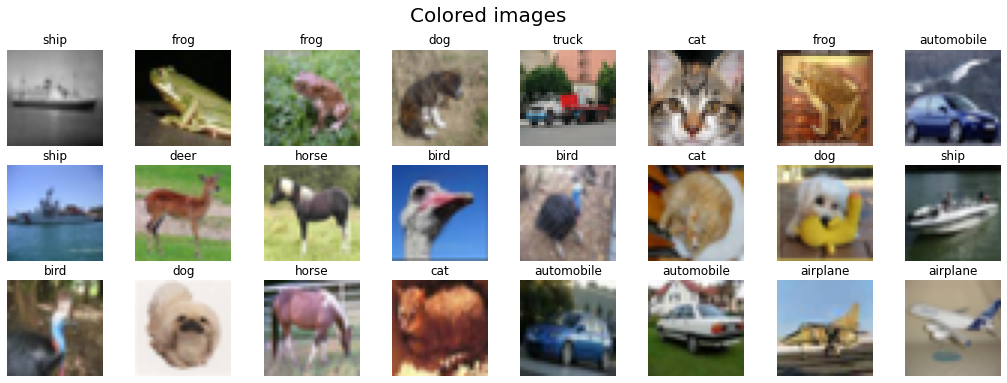

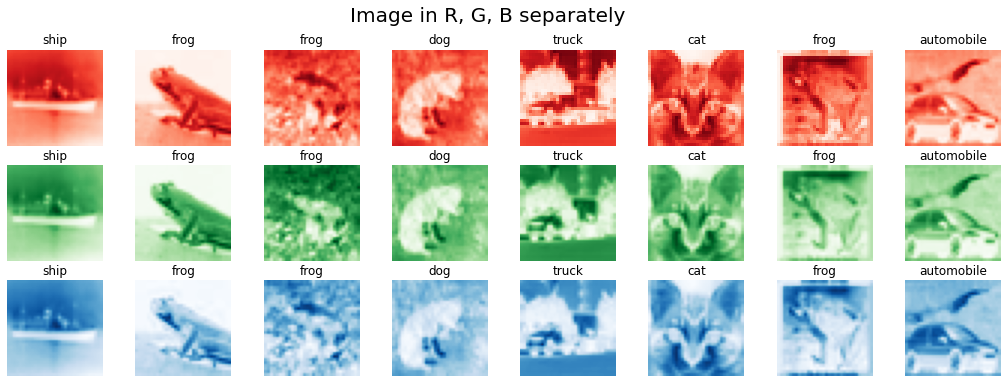

In [26]:
#set the nrows, ncols for the plot
rows, cols = 3, 8
#get random sample images by drawing indices randomly
idxs = torch.randint(len(train_data), size=(rows*cols,))
#get the list of label names
label_names = list(label_map.keys())

#plot the images
figure = plt.figure(figsize=(18, 6))
figure.suptitle("Colored images", fontsize=20)
for i, idx in enumerate(idxs):
    #get an index of a sample for the visulaization
    image, label = train_data[idx]
    label_name = label_names[label]
    # swap the tensor matrix axises for the matplotlib to read properly
    image_plot = image.permute(1,2,0)
    figure.add_subplot(rows, cols, i+1)
    plt.imshow(image_plot)
    plt.axis('off')
    plt.title(label_name)

#plot images in RGB separately
figure = plt.figure(figsize=(18, 6))
figure.suptitle("Image in R, G, B separately", fontsize=20)
cmaplist = ['Reds', 'Greens', 'Blues']
for i in range(cols):
    image, label = train_data[idxs[i]]
    label_name = label_names[label]
    image_plot = image.permute(1,2,0)
    for j in range (rows):
        figure.add_subplot(rows, cols, i+j*cols+1)
        plt.imshow(image_plot[:,:,j], cmap=cmaplist[j])
        plt.title(label_name)
        plt.axis('off')


- How do these samples look like in pytorch tensors?

In [13]:
# Let's print the first example
print (train_data[0])

#get the first example data and check the shape of the tensor (just like numpy array!)
print (f'Shape of each sample data: {train_data[0][0].shape}')


(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0

### `Fashion-MNIST`
Let's examine another PyTorch dataset called `Fashion-MNIST`. This dataset consists of 28$\times$28 images of different fashion objects. The dataset has 70K images in 10 different classes.

In [28]:
#load datasets
#loading the training data
train_data = datasets.FashionMNIST(
                root='FMNIST',
                train=True,
                download=True,
                transform=transforms.ToTensor())
#loading the test data
test_data = datasets.FashionMNIST(
                root='FMNIST',
                train=False,
                download=True,
                transform=transforms.ToTensor())

#check the number of samples, shapes of the datasets, etc
print (f'No. of samples in the training set: {len(train_data)}')
print (f'No. of samples in the test set: {len(test_data)}')

#get the sample label name, value mapping
label_map = train_data.class_to_idx
#check the mapping
print(f'\nMapping of each image class to label value: {label_map}')

No. of samples in the training set: 60000
No. of samples in the test set: 10000

Mapping of each image class to label value: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


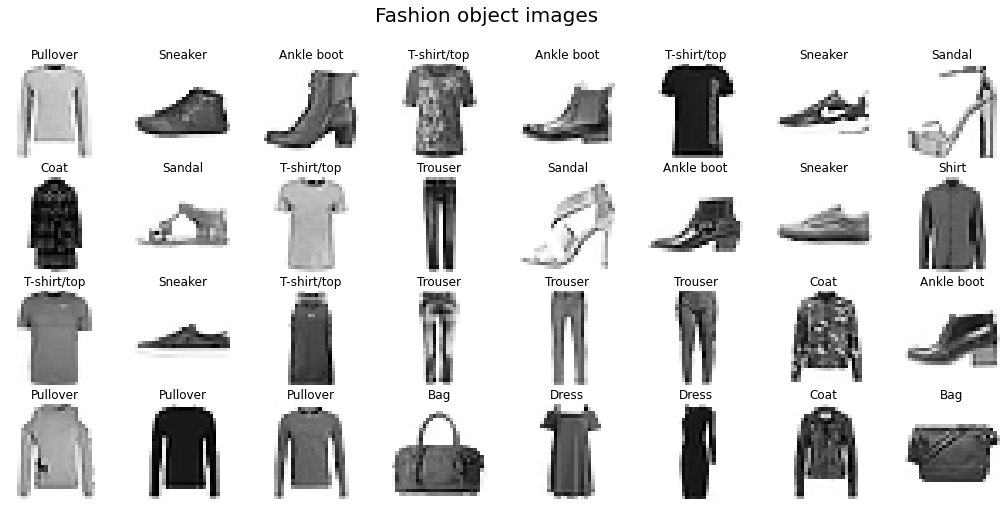

In [35]:
#set the nrows, ncols for the plot
rows, cols = 4, 8
#get random sample images by drawing indices randomly
idxs = torch.randint(len(train_data), size=(rows*cols,))
#get the list of label names
label_names = list(label_map.keys())

#plot the images
figure = plt.figure(figsize=(18, 8))
figure.suptitle("Fashion object images", fontsize=20)
for i, idx in enumerate(idxs):
    #get an index of a sample for the visulaization
    image, label = train_data[idx]
    label_name = label_names[label]
    image_plot = image.permute(1,2,0)
    figure.add_subplot(rows, cols, i+1)
    plt.imshow(image_plot, cmap='Greys')
    plt.axis('off')
    plt.title(label_name)


In [20]:
# Let's print the first example
print (train_data[0])

#get the first example data and check the shape of the tensor (just like numpy array!)
print (f'Shape of each sample data: {train_data[0][0].shape}')


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

## Bonus: some tensor operations?